# SimpleRNN

In [1]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN
#simpleRNN
model=Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

2023-01-14 09:29:25.448143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features=10000 #
maxlen=500
batch_size=32

print('Loading data...')
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
print(len(x_train),'train sequences')
print(len(x_test),'test sequences')

print('Pad Sequences(samples x time)')
x_train=sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=sequence.pad_sequences(x_test,maxlen=maxlen)
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
25000 train sequences
25000 test sequences
Pad Sequences(samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [3]:
from keras.layers import Dense

model=Sequential()
model.add(Embedding(max_features,32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,
                  epochs=10,batch_size=128,validation_split=0.2)
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

Epoch 1/10
157/157 [==============================] - 20s 124ms/step - loss: 0.6095 - acc: 0.6672 - val_loss: 0.4513 - val_acc: 0.8050
Epoch 2/10
157/157 [==============================] - 19s 122ms/step - loss: 0.3771 - acc: 0.8436 - val_loss: 0.3518 - val_acc: 0.8496
Epoch 3/10
157/157 [==============================] - 19s 120ms/step - loss: 0.2785 - acc: 0.8902 - val_loss: 0.3767 - val_acc: 0.8300
Epoch 4/10
157/157 [==============================] - 19s 119ms/step - loss: 0.2124 - acc: 0.9209 - val_loss: 0.3341 - val_acc: 0.8724
Epoch 5/10
157/157 [==============================] - 18s 118ms/step - loss: 0.1587 - acc: 0.9408 - val_loss: 0.6619 - val_acc: 0.8036
Epoch 6/10
157/157 [==============================] - 19s 122ms/step - loss: 0.1133 - acc: 0.9611 - val_loss: 0.6747 - val_acc: 0.7890
Epoch 7/10
157/157 [==============================] - 19s 119ms/step - loss: 0.0843 - acc: 0.9724 - val_loss: 0.4501 - val_acc: 0.8516
Epoch 8/10
157/157 [==============================] - 1

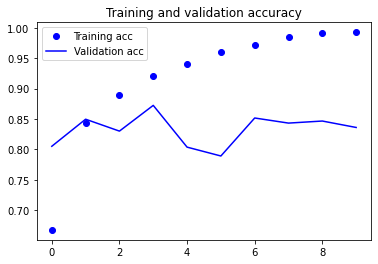

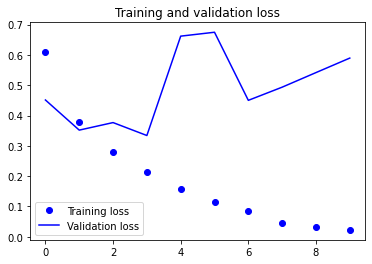

In [4]:
import matplotlib.pyplot as plt

epochs=range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# LSTM循环神经网络

In [5]:
from keras.layers import LSTM
#参数设置
max_features=10000 #作为特征的单词个数
maxlen=500
batch_size=32
#加载数据
print('Loading data...')
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)
print(len(x_train),'train sequences')
print(len(x_test),'test sequences')

print('Pad Sequences(samples x time)')
x_train=sequence.pad_sequences(x_train,maxlen=maxlen)
x_test=sequence.pad_sequences(x_test,maxlen=maxlen)
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad Sequences(samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [6]:
#模型搭建
model=Sequential()
model.add(Embedding(max_features,32))
model.add(LSTM(32))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(x_train,y_train,
                  epochs=10,batch_size=128,validation_split=0.2)
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

Epoch 1/10
157/157 [==============================] - 39s 247ms/step - loss: 0.4942 - acc: 0.7721 - val_loss: 0.3753 - val_acc: 0.8448
Epoch 2/10
157/157 [==============================] - 36s 229ms/step - loss: 0.2960 - acc: 0.8827 - val_loss: 0.3047 - val_acc: 0.8734
Epoch 3/10
157/157 [==============================] - 37s 233ms/step - loss: 0.2329 - acc: 0.9136 - val_loss: 0.2975 - val_acc: 0.8768
Epoch 4/10
157/157 [==============================] - 37s 235ms/step - loss: 0.1975 - acc: 0.9276 - val_loss: 0.3674 - val_acc: 0.8808
Epoch 5/10
157/157 [==============================] - 36s 230ms/step - loss: 0.1703 - acc: 0.9390 - val_loss: 0.2852 - val_acc: 0.8838
Epoch 6/10
157/157 [==============================] - 36s 231ms/step - loss: 0.1534 - acc: 0.9456 - val_loss: 0.4147 - val_acc: 0.8302
Epoch 7/10
157/157 [==============================] - 36s 229ms/step - loss: 0.1438 - acc: 0.9493 - val_loss: 0.3151 - val_acc: 0.8904
Epoch 8/10
157/157 [==============================] - 3

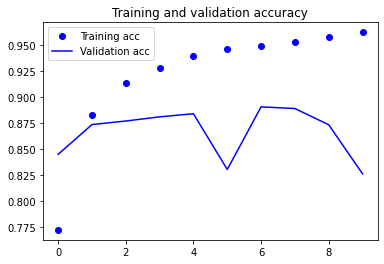

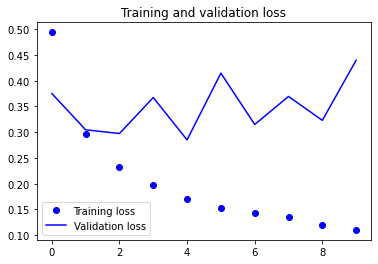

In [7]:
epochs=range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()